In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

**1.**

In [2]:
data = pd.read_csv('hr.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**2.**

In [4]:
def gen_stats(series):
    print('Среднее значение:', series.mean())
    print('Мода:', int(stats.mode(series)[0]))
    print('Минимум:', series.min())
    print('Максимум:', series.max())
    print('Стандартное отклонение:', series.std())

In [5]:
for i in range(7):
    print(f'{data.iloc[:, i].name}:')
    gen_stats(data.iloc[:, i])
    print()

satisfaction_level:
Среднее значение: 0.6128335222348156
Мода: 0
Минимум: 0.09
Максимум: 1.0
Стандартное отклонение: 0.24863065106114257

last_evaluation:
Среднее значение: 0.7161017401160078
Мода: 0
Минимум: 0.36
Максимум: 1.0
Стандартное отклонение: 0.17116911062327533

number_project:
Среднее значение: 3.80305353690246
Мода: 4
Минимум: 2
Максимум: 7
Стандартное отклонение: 1.2325923553183522

average_montly_hours:
Среднее значение: 201.0503366891126
Мода: 135
Минимум: 96
Максимум: 310
Стандартное отклонение: 49.94309937128408

time_spend_company:
Среднее значение: 3.498233215547703
Мода: 3
Минимум: 2
Максимум: 10
Стандартное отклонение: 1.4601362305354812

Work_accident:
Среднее значение: 0.1446096406427095
Мода: 0
Минимум: 0
Максимум: 1
Стандартное отклонение: 0.35171855238017985

left:
Среднее значение: 0.2380825388359224
Мода: 0
Минимум: 0
Максимум: 1
Стандартное отклонение: 0.4259240993802994



**3.**

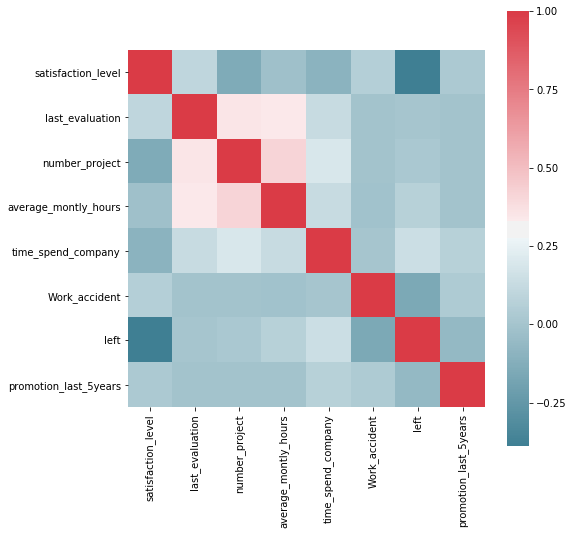

In [6]:
f, ax = plt.subplots(figsize=(8, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

**4.**

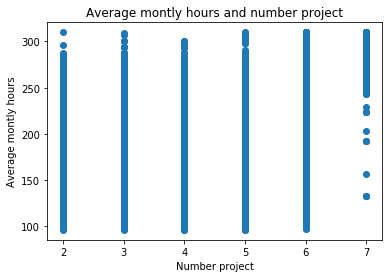

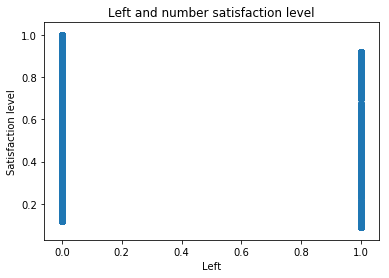

In [7]:
plt.scatter(data.number_project, data.average_montly_hours)
plt.title('Average montly hours and number project')
plt.xlabel('Number project')
plt.ylabel('Average montly hours')
plt.show()

plt.scatter(data.left, data.satisfaction_level)
plt.title('Left and number satisfaction level')
plt.xlabel('Left')
plt.ylabel('Satisfaction level')
plt.show()

**5.**

Возьмем две переменные, Satisfaction level и Last evaluation

Нулевая гипотеза - выборки не отличаются.

In [8]:
stats.ttest_ind(data.satisfaction_level, data.last_evaluation)

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

t-value равно -42, что является большим значением и говорит о том, что выборки сильно различаются. p-value меньше 0.05 - это подтверждает, что группы статистически отличаются.

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


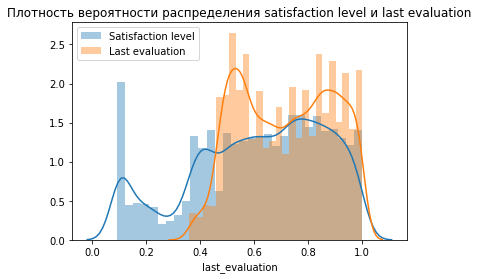

In [9]:
sns.distplot(data.satisfaction_level)
sns.distplot(data.last_evaluation)
plt.title('Плотность вероятности распределения satisfaction level и last evaluation')
plt.legend(['Satisfaction level', 'Last evaluation'])
plt.show()

**6.**

In [10]:
# смотрим имена всех департаментов
departments = data.sales.unique()

In [11]:
data.groupby('sales')['left'].count()

sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: left, dtype: int64

**7.**

In [12]:
salary_count = data.groupby('salary')['left'].count().sort_values(ascending=False)

Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

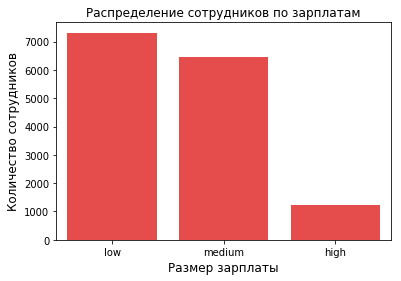

In [13]:
fig=sns.barplot(salary_count.index, salary_count, color="red",alpha=0.8)
plt.xlabel('Размер зарплаты', fontsize=12)
plt.ylabel('Количество сотрудников', fontsize=12)
plt.title('Распределение сотрудников по зарплатам')

**8.**

In [14]:
department_salary_count = data.groupby(['sales', 'salary'])['left'].count()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

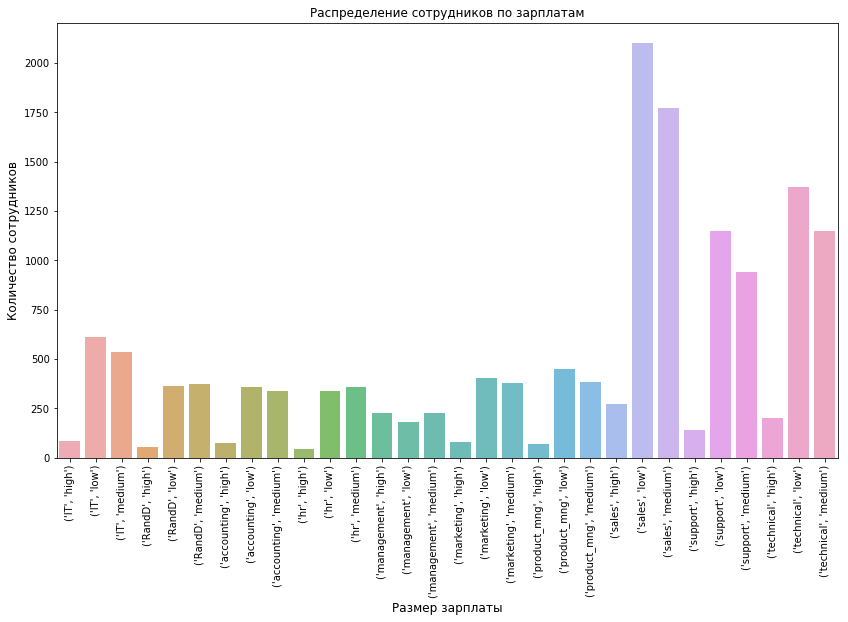

In [15]:
f, ax = plt.subplots(figsize=(14, 8))
fig=sns.barplot(department_salary_count.index, department_salary_count, alpha=0.8)
plt.xlabel('Размер зарплаты', fontsize=12)
plt.ylabel('Количество сотрудников', fontsize=12)
plt.title('Распределение сотрудников по зарплатам')
plt.xticks(rotation=90)

**9.**

In [16]:
print('Сотрудников покинувших компанию:', data.left.sum())

Сотрудников покинувших компанию: 3571


**10.**

In [46]:
from sklearn.model_selection import train_test_split

x = data.drop(['left', 'sales', 'salary'], axis=1)
y = data.left

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2, # %80 train, 20% test
                                                    random_state = 5)

Попробуем предсказывать увольнение сотрудника с помощью логистической регрессии и random forest classifier

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression()
model.fit(x_train, y_train)
predicted_classes = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted_classes)
print('Точность предсказания модели логистической регрессии: ', accuracy)
parameters = model.coef_

Точность предсказания модели логистической регрессии:  0.754


C:\Users\Ivan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
model1 = RandomForestClassifier(n_estimators=100)

# обучаем модель
model1.fit(x_train, y_train)

print('Точность предсказания Random Forest Classifier:', model1.score(x_test, y_test))

Точность предсказания Random Forest Classifier: 0.992


Результат: random forest classifier гораздо лучше справляется с предсказанием уволнения сотрудника